# Prueba de evaluación 3 Entornos de data science con Python

**Parte 1:**

Como os indiqué en clase, en esta prueba abierta de temática libre trata de que hagáis un análisis de un dataset que vosotros seleccionéis (del repositorio de statsmodels, del de R o de cualquier otro que encontréis en Internet). Se valorará la presentación de las ideas de análisis, el uso de la herramienta de los Notebooks, gráficos que sean relevantes y de las bibliotecas del stack científico de Python. 
 
Solo se pide llegar al análisis estadístico básico, no a hacer modelos productivos con aprendizaje automático. No se pretende hacer un estudio estadístico inferencias avanzado sino un estudio exploratorio que muestre hallazgos interesantes en el dataset. Es muy valorable el cómo comuniquéis los hallazgos, por lo que no es cuestión de incluir todos los análisis, sino los que resulten informativos e interesantes, en formatos gráficos o numéricos fáciles de leer y entender. 

### Dataset de vuelos que salen o arrivan con retrasos para el año 2008

He selecionado un datasat de vuelos estraido del link http://stat-computing.org/dataexpo/2009/the-data.html, el cual contiene datos de trafico aereo de diferentes años. Para este ejercicio seleccione el 2008, como el dataset contiene todos los datos de vuelos, nos enfocaremos en los que tuvieron retrasos. 

Los campos que contiene el dataset son:

|No.  | Name |Description  |
|-----|-------------|
|1    | Year | 2008 |
|2    | Month | 1-12 |
|3    | DayofMonth | 1-31 |
|4    | DayOfWeek | 1 (Monday) - 7 (Sunday) |
|5    | DepTime | actual departure time (local, hhmm) |
|6    | CRSDepTime | scheduled departure time (local, hhmm) | 
|7    | ArrTime | actual arrival time (local, hhmm) |
|8    | CRSArrTime | scheduled arrival time (local, hhmm) |
|9    | UniqueCarrier | unique carrier code |
|10   | FlightNum | flight number |
|11   | TailNum | plane tail number |
|12   | ActualElapsedTime | in minutes| 
|13   | CRSElapsedTime | in minutes |
|14   | AirTime | in minutes |
|15   | ArrDelay | arrival delay, in minutes |
|16   | DepDelay | departure delay, in minutes |
|17   | Origin | origin IATA airport code |
|18   | Dest | destination IATA airport code |
|19   | Distance | in miles |
|20   | TaxiIn | taxi in time, in minutes |
|21   | TaxiOut | taxi out time in minutes |
|22   | Cancelled | was the flight cancelled? |
|23   | CancellationCode | reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |
|24   | Diverted | 1 = yes, 0 = no |
|25   | CarrierDelay | in minutes |
|26   | WeatherDelay | in minutes |
|27   | NASDelay | in minutes |
|28   | SecurityDelay | in minutes |
|29   | LateAircraftDelay | in minutes |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

Cargo el archivo orginal 1 sola vez y lo transformo a mis registros seleccionados, lo guardo en un csv,
para poder abrirlo y trabajar sobre el archivo final de trabajo.

In [2]:
#fileop = '2008.csv'
#print "Operando archivo -- > " + fileop
#Flights = pd.read_csv(fileop, sep=',', header=0)
#Flights.head(10)

In [3]:
#Flights.loc[Flights['CancellationCode'].isnull(),'CancellationCode'] = 'N'
#np.unique(Flights['CancellationCode'])
#DelayedFlights = Flights[Flights['DepDelay'] > 5]
#DelayedFlights.index
#DelayedFlights.to_csv("DelayedFlights.csv")

A partir de ahora, solo cargaremos el archivo depurado. Para efectos de este ejercicio, considerar que se considera un vuelo demorado, si se demora mas de 5 minutos.

In [4]:
fileop = 'DelayedFlights.csv'
print "Operando archivo -- > " + fileop
DelayedFlights = pd.read_csv(fileop, sep=',', header=0)
DelayedFlights.head(10)
DelayedFlights.index

Operando archivo -- > DelayedFlights.csv


RangeIndex(start=0, stop=1936758, step=1)

** Podemos ver que hay 1,936,758 vuelos con retraso en el 2008, en los aeropuertos de USA **

Ordenaremos los datos, por fecha y hora, creamos 1 nueva columna para la agrupacion 

In [5]:
DelayedFlights.drop(['Unnamed: 0'],inplace=True,axis=1)
DelayedFlights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,2008,1,3,4,706.0,700,916.0,915,WN,100,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


In [6]:
#DelayedFlights['Month'] = DelayedFlights['Month'].apply(lambda x: '{0:0>2}'.format(x))
#DelayedFlights['DayofMonth'] = DelayedFlights['DayofMonth'].apply(lambda x: '{0:0>2}'.format(x))
DelayedFlights['CRSDepTime'] = DelayedFlights['CRSDepTime'].apply(lambda x: '{0:0>4}'.format(x))
DelayedFlights['CRSDepTime'] = pd.to_datetime(DelayedFlights['CRSDepTime'], format='%H%M')
DelayedFlights['CRSDepTime'] = DelayedFlights['CRSDepTime'].dt.time

In [7]:
DelayedFlights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,19:55:00,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,07:35:00,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,06:20:00,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,17:55:00,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,19:15:00,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1937.0,18:30:00,2037.0,1940,WN,509,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,2008,1,3,4,706.0,07:00:00,916.0,915,WN,100,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,1644.0,15:10:00,1845.0,1725,WN,1333,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,2008,1,3,4,1029.0,10:20:00,1021.0,1010,WN,2272,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1452.0,14:25:00,1640.0,1625,WN,675,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


In [8]:
DelayedFlights.sort_values(by=['Year','Month','DayofMonth','CRSDepTime'], inplace=True)
DelayedFlights = DelayedFlights.reset_index(drop=True)
DelayedFlights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,1,2,45.0,00:25:00,547.0,535,AA,622,...,5.0,12.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,1,2,124.0,00:40:00,653.0,612,NW,362,...,6.0,13.0,0,N,0,10.0,0.0,0.0,0.0,31.0
2,2008,1,1,2,125.0,00:45:00,644.0,605,AA,1806,...,10.0,13.0,0,N,0,0.0,0.0,0.0,0.0,39.0
3,2008,1,1,2,110.0,00:55:00,759.0,803,DL,560,...,9.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,1,2,121.0,01:00:00,619.0,608,NW,166,...,6.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,1,2,131.0,01:08:00,826.0,740,DL,792,...,11.0,26.0,0,N,0,23.0,0.0,23.0,0.0,0.0
6,2008,1,1,2,136.0,01:10:00,613.0,600,AA,2454,...,5.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,1,2,152.0,01:46:00,940.0,917,US,634,...,4.0,14.0,0,N,0,6.0,0.0,17.0,0.0,0.0
8,2008,1,1,2,432.0,03:25:00,720.0,623,B6,708,...,11.0,14.0,0,N,0,0.0,0.0,0.0,0.0,57.0
9,2008,1,1,2,451.0,04:15:00,647.0,625,B6,768,...,8.0,18.0,0,N,0,18.0,0.0,0.0,0.0,4.0


In [9]:
#DelayedFlights['DateTime'] = DelayedFlights.Year.map(str) + '/' + DelayedFlights.Month.map(str) + '/' \
#                             + DelayedFlights.DayofMonth.map(str) + ' ' + DelayedFlights.CRSDepTime.map(str)
DelayedFlights['DateTime'] = DelayedFlights.Year.map(str) + '/' + DelayedFlights.Month.map(str) + '/' \
                             + DelayedFlights.DayofMonth.map(str)

### Top de aeropuertos con mas retrasos

In [10]:
Top10Airports = DelayedFlights.groupby('Origin').size()
Top10Airports.sort_values(inplace=True, ascending=False)
Top10Airports[:10]

Origin
ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
IAH     56847
PHX     55720
LAS     53710
EWR     52925
DTW     43923
dtype: int64

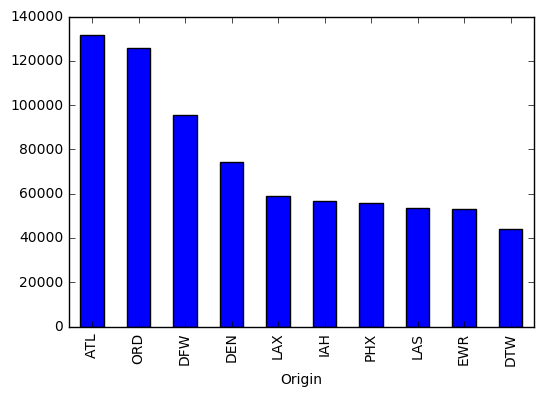

In [11]:
Top10Airports[:10].plot(kind='bar')

Veamos una grafica de cuantos Vuelos se atrazaron por DIA Y POR MES

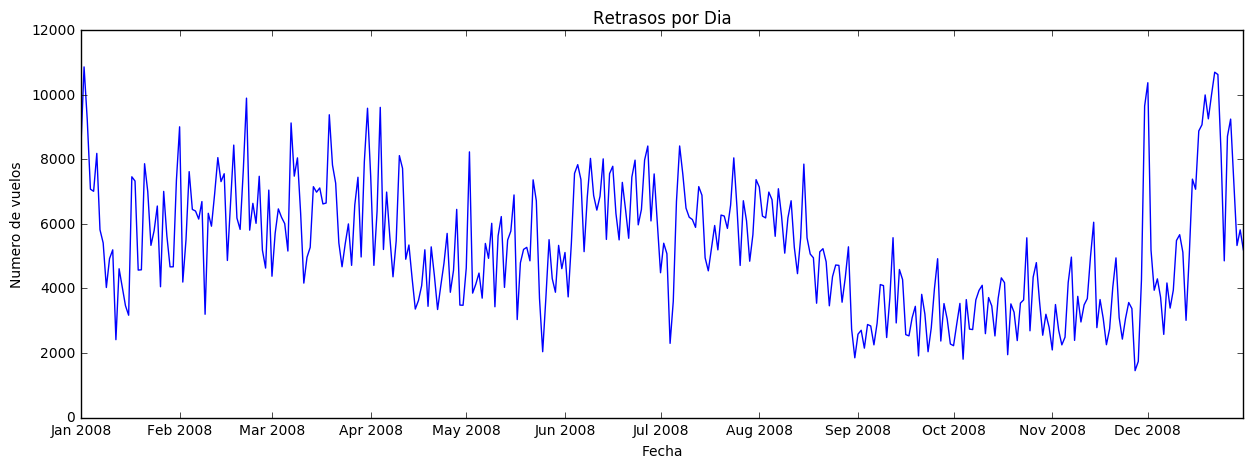

In [12]:
Group = DelayedFlights.groupby(['Year','Month','DayofMonth'])['DayofMonth'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(DelayedFlights.DateTime.unique(), Count['count'], '-')
ax.set_ylabel('Numero de vuelos')
ax.set_xlabel('Fecha')
ax.set_title('Retrasos por Dia')

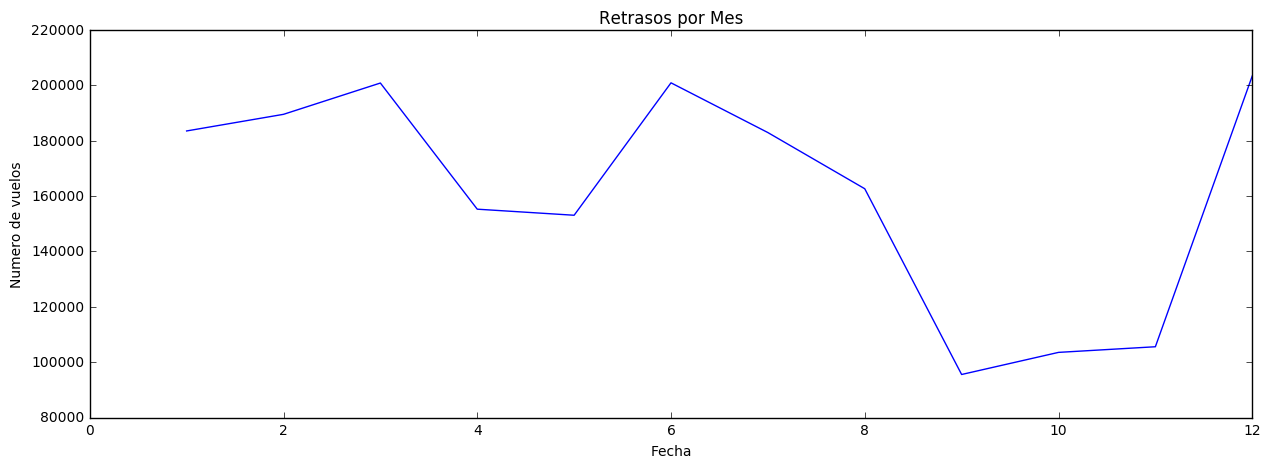

In [14]:
Group = DelayedFlights.groupby(['Year', 'Month'])['Month'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(DelayedFlights.Month.unique(), Count['count'], '-')
ax.set_ylabel('Numero de vuelos')
ax.set_xlabel('Fecha')
ax.set_title('Retrasos por Mes')

In [30]:
DelayedFlights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime            object
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
DateTime              object
dtype: object

In [8]:
Minutos.sort_values(inplace=True, ascending=False)
Minutos

DepDelay
6.0       91605
7.0       83634
8.0       76224
10.0      73476
9.0       70220
11.0      58760
12.0      55234
13.0      51683
15.0      51352
14.0      48174
16.0      41950
17.0      39880
20.0      39238
18.0      37547
19.0      35410
21.0      31752
22.0      30431
25.0      30296
23.0      29198
24.0      27636
26.0      25073
30.0      25003
27.0      23954
28.0      22793
29.0      21784
35.0      19907
31.0      19709
32.0      19153
33.0      18816
34.0      17882
          ...  
828.0         1
832.0         1
839.0         1
840.0         1
842.0         1
843.0         1
845.0         1
852.0         1
865.0         1
867.0         1
879.0         1
882.0         1
883.0         1
885.0         1
887.0         1
890.0         1
894.0         1
895.0         1
898.0         1
903.0         1
905.0         1
906.0         1
908.0         1
911.0         1
916.0         1
917.0         1
920.0         1
921.0         1
925.0         1
2467.0        1
dtype: int64

In [9]:
atl = DelayedFlights[DelayedFlights['Origin'] == 'ATL']
atl

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
33678,104019,2008,1,20,7,1403.0,1330,1625.0,1608,XE,...,6.0,32.0,0,N,0,0.0,0.0,17.0,0.0,0.0
35013,108680,2008,1,3,4,1429.0,1340,1531.0,1500,XE,...,7.0,11.0,0,N,0,4.0,0.0,0.0,0.0,27.0
35165,109189,2008,1,31,4,1217.0,1210,1511.0,1335,XE,...,21.0,60.0,0,N,0,0.0,0.0,96.0,0.0,0.0
35225,109405,2008,1,28,1,1229.0,1210,1343.0,1335,XE,...,6.0,20.0,0,N,0,NaN,NaN,NaN,NaN,NaN
35511,110375,2008,1,19,6,1241.0,1215,1735.0,1437,XE,...,12.0,178.0,0,N,0,0.0,0.0,164.0,0.0,14.0
35593,110597,2008,1,1,2,1351.0,1340,1516.0,1500,XE,...,7.0,16.0,0,N,0,11.0,0.0,5.0,0.0,0.0
37068,115608,2008,1,4,5,2005.0,1925,2146.0,2115,XE,...,8.0,15.0,0,N,0,0.0,0.0,0.0,0.0,31.0
38227,119480,2008,1,1,2,1448.0,1345,1706.0,1623,XE,...,5.0,35.0,0,N,0,10.0,0.0,0.0,0.0,33.0
38594,120784,2008,1,8,2,1842.0,1835,2040.0,1957,XE,...,10.0,51.0,0,N,0,7.0,0.0,36.0,0.0,0.0
38730,121229,2008,1,3,4,1421.0,1200,1526.0,1325,XE,...,9.0,13.0,0,N,0,17.0,0.0,0.0,0.0,104.0


In [19]:
DelayedFlights.head(20)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


In [10]:
DelayedFlights

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
